In [29]:
from numpy import *
import operator
import matplotlib
import matplotlib.pyplot as plt

# Example 1 : On Dummy Data

In [2]:
def createDataSet():
    group = array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ["A", "A", "B", "B"]
    return group, labels

In [4]:
group, labels = createDataSet()

In [5]:
group

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 0.1]])

In [6]:
labels

['A', 'A', 'B', 'B']

In [13]:
"""
For every point in our dataset:
    calculate the distance between inX and the current point
    sort the distances in increasing order
    take k items with lowest distances to inX
    find the majority class among these items
    return the majority class as our prediction for the class of inX
"""


def classify0(inX: ndarray, dataSet: ndarray, labels: list, k: int) -> int:
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet
    print("diffMat", diffMat)
    sqDiffMat = diffMat**2
    print("sqDiffMat", sqDiffMat)
    sqDistances = sqDiffMat.sum(axis=1)
    print("sqDistances", sqDistances)
    distances = sqDistances**0.5
    print("distances", distances)
    sortedDistIndicies = distances.argsort()
    print("sortedDistIndicies", sortedDistIndicies)
    classCount = {}

    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1

    sortedClassCount = sorted(
        classCount.items(),
        key=operator.itemgetter(1),
        reverse=True,
    )
    print("sortedClassCount", sortedClassCount)

    return sortedClassCount[0][0]

In [15]:
classify0([0, 0], group, labels, 3)

diffMat [[-1.  -1.1]
 [-1.  -1. ]
 [ 0.   0. ]
 [ 0.  -0.1]]
sqDiffMat [[1.   1.21]
 [1.   1.  ]
 [0.   0.  ]
 [0.   0.01]]
sqDistances [2.21 2.   0.   0.01]
distances [1.48660687 1.41421356 0.         0.1       ]
sortedDistIndicies [2 3 1 0]
sortedClassCount [('B', 2), ('A', 1)]


'B'

# Example 2 : matches from a dating site

In [39]:
def file2matrix(filename):
    fr = open(filename)
    arrayOLines = fr.readlines()
    numberOfLines = len(arrayOLines)
    numberOfColumns = len(arrayOLines[0].split("\t"))
    returnMat = zeros((numberOfLines, numberOfColumns - 1))
    classLabelVector = []
    index = 0

    for line in arrayOLines:
        line = line.strip()
        listFromLine = line.split("\t")
        returnMat[index, :] = listFromLine[0 : numberOfColumns - 1]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1

    return returnMat, classLabelVector

In [40]:
datingDataMat, datingLabels = file2matrix("../datasets/datingTestSet2.txt")

In [41]:
print(
    datingDataMat,
    datingDataMat.shape,
    "\n",
    datingLabels[:10],
    len(datingLabels),
    sep="\n",
)

[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 ...
 [2.6575000e+04 1.0650102e+01 8.6662700e-01]
 [4.8111000e+04 9.1345280e+00 7.2804500e-01]
 [4.3757000e+04 7.8826010e+00 1.3324460e+00]]
(1000, 3)


[3, 2, 1, 1, 1, 1, 3, 3, 1, 3]
1000


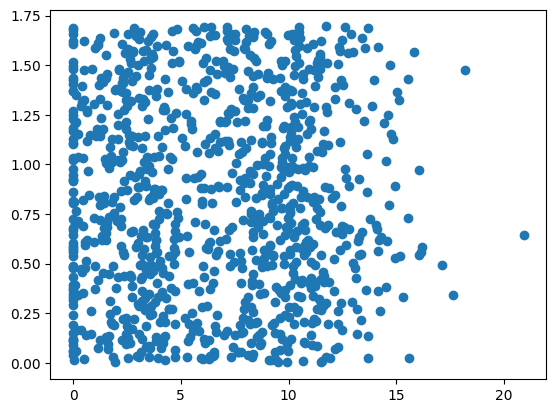

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:, 1], datingDataMat[:, 2])
plt.show()

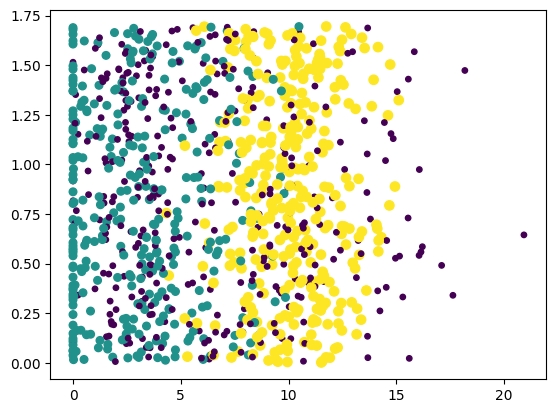

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(
    datingDataMat[:, 1],
    datingDataMat[:, 2],
    15.0 * array(datingLabels),
    15.0 * array(datingLabels),
)
plt.show()